# Como escolher um celular usando inferência Bayesiana?

Supondo que se está em dúvida de qual celular comprar, celulares com características semelhantes mas de marcas diferentes. Para ficar mais fácil a compreensão da situação irei supor que um celular é da marca Motorola e outro da Xiaomi. Quando se está nessa dúvida normalmente segue um caminho. 

- O primeiro passo que normalmente é seguido é ver os *reviews* para saber o que as pessoas estão falando sobre os produtos desejados, supondo que um celular da Motorola tenha uma nota de 4,6 de 5 e o celular da Xiaomi tenha nota 4,7 de 5, isso no mesmo site para que seja possível fazer uma comparação.
- Ao ver o número de *reviews*, o próximo passo é ver quantas pessoas avaliaram cada um. Dessa forma descobre-se que para o celular da motorola (nota 4,6) teve 300 avaliações e o da Xiaomi (nota 4,7) recebeu 201 avaliações. 

Isso já começa gerar uma dúvida, porque o da Xiaomi é um pouco superior, mas o fato dele ter recebido menos notas é desfavorável, porque entre as 99 pessoas de diferença alguém pode descobrir algo ruim. Para poder saber isso mais a fundo que será utilizado a inferência Bayesiana. O foco será de encontrar qual a probabilidade de comprar um celular, isso irá fazer que se escolha. 

Cada celular será olhado individualmente, o primeiro será o da Xiaomi. Das pessoas que avaliaram 83% deram noa 5, 9% deram nota 4, 3% deram nota 3, 1% deu nota 2 e 3% deram nota 1. Quando a pessoa da uma nota 3 não se sabe ao certo se a pessoa gostou ou não do celular. Para que o problema seja simplificado, todas as pessoas que deram nota 4 ou 5 serão consideradas como notas positivas, as pessoas que deram nota 1 ou 2 como notas negativas e as pessoas que deram nota 3 serão excluídas já que não se sabe se elas gostaram ou não. Com essas informações definidas será definido o evento A, que é o fato da pessoa ir no site e dar nota positiva, tendo o evento A é possível calcular a probabilidade dessse evento acontecer.

- A: Avaliação positiva da Xiaomi;
- P(A): Probabilidade do evento A ocorrer. 

Além disso supõe-se que é feita a seguinte pergunta para uma pessoa aleatória: Qual a probabilidade de avaliar positivamente a Xiaomi? 

**Resposta**: Tanto faz, as pessoas não conhecem a marca. 

Uma resposta desse tipo, para a estatística, é considerada que há chances iguais de recomendar e de não recomendar. 

Com essa resposta é necessário modelar ela para que seja vista como formato estatístico. Para fazer isso utiliza-se as distribuições de probabilidade, que são funções com parâmetros de entrada e retornam uma distribuição de probabilidade (curvas em determinado formato). Será utilizado a distribuição beta, essa distribuição tem como parãmetro de entrada o alfa e o beta, dependendo desses valores de entrada as curvas irão assumir formatos diferentes. Já que é considerado que há chances iguais de recomendações positivas e negativas os dois parâmetros de entrada serão 1.

- P(A) ~ Beta(1, 1)

Toda essa consideração em relação a avaliação do celular da Xiaomi é com pré-conceito, ou seja, um conceito que ainda não foi definido. Com essa consideração inicial pronta o próximo passo é analisar as avaliações de uso, para que assim se crie um conceito definido. Isso tudo é a base da inferência Bayesiana.

O mesmo será feito com o celular da Motorola...

No site da Amazon o celular da Motorola recebeu 77% de nota 5, 15% de nota 4, 2% nota 3, 2% nota 2 e 3% nota 1. Da mesma forma que foi feito com as notas Xiaomi, para o da Motorola as notas 4 e 5 serão notas positivas, 1 e 2 notas negativas e as notas 3 serão excluídas. Para esse evento B serão as avaliações positivas e também é possível calcular a sua probabilidade.

- B: Avaliação positiva para Motorola;
- P(B): Probabilidade da avaliação positiva.

Questionamento: Qual a probabilidade de avaliar positivamente o celular da Motorola?

**Resposta**: Alta, as pessoas conhecem esa marca. 

Novamente será utilizado distribuição Beta para esse problema. 

P(B) ~ (5, 2)

Esses valores escolhidos para alfa e para beta fazem com que a curva de resposta esteja mais deslocada para a resposta (avaliação) positiva. 

Com todas as avaliações prévias estabelecidas o próximo passo é fazer a modelagem do processo de avaliação das pessoas.  É necessário considerar que o processo de avaliação é igual para todas as pessoas, portanto o modelo de distribuição que será utilizado é o de Bernoulli.

- P(Avaliações|A) ~ Bernoulli(pA)

- P(Avaliações|B) ~ Bernoulli(pB)

Para juntar as duas avaliações será feita uma multiplicação e o resultado vai ser a probabilidade de avaliar de determinada forma um *smartfone* dado todos os parãmetros observados:

P(A|Avaliações) = P(Avaliações|A) * P(A) / P(Avaliações)

Essa fórmula é exatamente o **Teorema de Bayes**.

A inferência Bayesiana é muito útil quando se tem poucos dados e ainda quer colocar um pouco de experiência pessoal. 

Algumas pessoas podem não entender porque tem que fazer a Análise Exploratória de Dados antes de colocar um algoritmo de *Machine Learning* para rodar, um motivo pode ser justamente a falta de conhecimento sobre os dados. Ao fazer a Análise Exploratória irá adquirir conhecimento sobre os dados e pode utilizar esse conhecimento no Teorema de *Bayes* para resolver o problema. 


## Imports

In [9]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

## Dados

Para cada uma das marcas foram pegos a quantidade de respostas que ela tem, multiplicado pela porcentagem de pessoas que deu determinada nota, dessa forma sabe-se quantas pessoas deram aquela nota. O parâmetro "[1]" é para as respostas positivas e o parâmetro "[0]" para as respostas negativas.

In [2]:
#Dados Xiaomi
X_a = np.array([1] * (int(0.83 * 201) + int(0.09 * 201)) + [0] * (int(0.01 * 201) + int(0.03 * 201)))
np.random.shuffle(X_a)

#Dados Motorola
X_b = np.array([1] * (int(0.78 * 301) + int(0.15 * 301)) + [0] * (int(0.02 * 301) + int(0.03 * 301)))
np.random.shuffle(X_b)

In [3]:
X_a, X_b

(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## Inferência Bayesiana

Na Inferência Bayesiana há trẽs parãmetros:

- Prior: Elemento inicial, normalmente estabelecido devido alguma experiência anterior. Nesse exemplo é a primeira análise que foi feita, se a pessoa compraria aquele celular com o conhecimento que ela tem sobre ele. 
- Likelihood: São os dados que serão utilizados para análise. 
- Posterior: Elemento que vai melhorando a cada leitura de dados. Esse elemento pega a experiência anterior, lê os dados existentes (likelihood) e assim atualiza a informação da experiência anterior, isso é feito para cada dado e a cada leitura melhor é o resultado.

In [8]:
with pm.Model() as model:
    #Prior 
    p_a = pm.Beta('p_a', 1, 1)
    p_b = pm.Beta('p_b', 5, 2)

    #Deterministic
    delta = pm.Deterministic('delta', p_a - p_b)

    #Posterior
    obs_a = pm.Bernoulli('obs_a', p_a, observed = X_a)
    obs_b = pm.Bernoulli('obs_b', p_b, observed = X_b)

    #Likelihood
    trace = pm.sample(draws = 2000, tune = 1000, step = pm.Metropolis())

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [p_b]
>Metropolis: [p_a]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 4 seconds.
The number of effective samples is smaller than 25% for some parameters.


## Plot Posterior

<AxesSubplot:title={'center':'x'}>

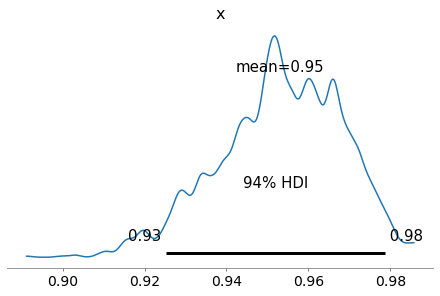

In [6]:
pm.plot_posterior(trace['p_a'])

A posteriori é uma distribuição de probabilidade, possui o formato de curva e possui um pico de máximo. O primeiro ponto que tem que ser observado é o pico de máximo (MAP) é o valor máximo e a média dos valores. No exemplo trabalhado aqui esse valor máximo será a probabilidade de avaliar positivamente algum celular. Outro ponto que tem que ser observado é que está sendo feito a estimativa do MAP, tem que dar o valor de incerteza também, a incerteza é representada pela largura da curva, ou seja, quanto mais larga for a curva em torno do ponto central, maior será a incerteza, quanto mais dados forem fornecidos para realizar o cálculo, menor será a incerteza em relação ao MAP. 

Probabilidade para avaliação positiva da Xiaomi:

- MAP: 0.95;
- incerteza: 0.93 até 0.98,

<AxesSubplot:title={'center':'x'}>

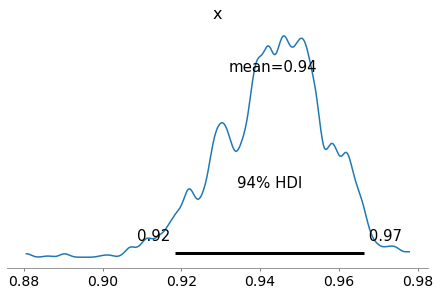

In [7]:
pm.plot_posterior(trace['p_b'])

Probabilidade para avaliação positiva da motorola:

- MAP: 0.94;
- Incerteza: 0.92 a 0.97.

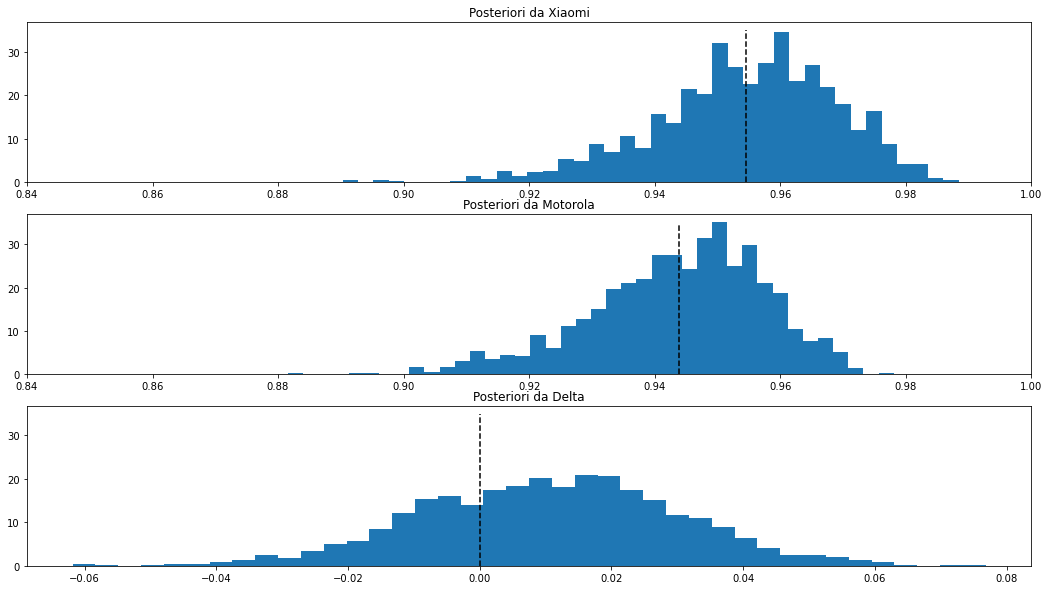

In [17]:
plt.figure(figsize=(18,10))

plt.subplot(311)
plt.hist(trace['p_a'], histtype = 'stepfilled', bins = 40, density = True)
plt.xlim([0.84, 1])
plt.vlines(trace['p_a'].mean(), 0, 35, linestyles='--', color = 'black')
plt.title('Posteriori da Xiaomi')

plt.subplot(312)
plt.hist(trace['p_b'], histtype = 'stepfilled', bins = 40, density = True)
plt.xlim([0.84, 1])
plt.vlines(trace['p_b'].mean(), 0, 35, linestyles='--', color = 'black')
plt.title('Posteriori da Motorola')

plt.subplot(313)
plt.hist(trace['delta'], histtype = 'stepfilled', bins = 40, density = True)
plt.vlines(0, 0, 35, linestyles='--', color = 'black')
plt.title('Posteriori de Delta');

No primeiro e segundo  gráfico temos a posteriori da Xiaomi e da Motorola, respectivamente. O terceiro gráfico é a subtração de toda chance de avaliar positivamente a Xiaomi por toda a chance de avaliar positivamente a Motorola, com isso se pegar a média de todos os pontos positivos desse terceiro gráfico terá a probabilidade de gostar mais da Xiaomi do que da Motorola e se pegar a média de todos os pontos negativos terá a probabilidade de gostar mais da Motorola. 

In [25]:
Xiaomi = np.mean(trace['delta'] > 0)
Motorola = np.mean(trace['delta'] < 0)

print(f'Probabilidade de VOCÊ gostar mais do Smartphone da Xiaomi: {Xiaomi}')
print(f'Probabilidade de VOCÊ gostar mais do Smartphone da Motorola: {Motorola}')

Probabilidade de VOCÊ gostar mais do Smartphone da Xiaomi: 0.70175
Probabilidade de VOCÊ gostar mais do Smartphone da Motorola: 0.29825


Baseado na experiẽncia pessoal juntamente com a avaliação das outras pessoas é possível afirmar que a probabilidade de gostar da Xiaomi é de 70%, enquanto que para gostar da Motorola é de 30%. 

## Modificando o parâmetro de experiência pessoal

Com uma probabilidade de (17, 1) estará assumindo que por experiência pessoal tem 95% de chance de gostar da Motorola.

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [p_b]
>Metropolis: [p_a]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 4 seconds.
The number of effective samples is smaller than 25% for some parameters.


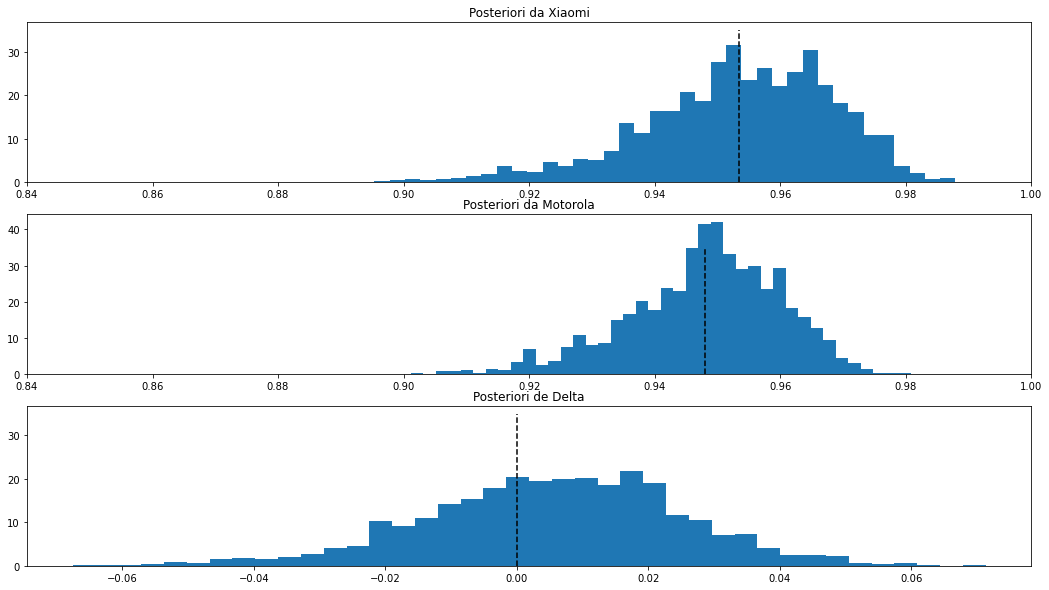

In [26]:
with pm.Model() as model:
    #Prior 
    p_a = pm.Beta('p_a', 1, 1)
    p_b = pm.Beta('p_b', 17, 1)

    #Deterministic
    delta = pm.Deterministic('delta', p_a - p_b)

    #Posterior
    obs_a = pm.Bernoulli('obs_a', p_a, observed = X_a)
    obs_b = pm.Bernoulli('obs_b', p_b, observed = X_b)

    #Likelihood
    trace = pm.sample(draws = 2000, tune = 1000, step = pm.Metropolis())

    plt.figure(figsize=(18,10))

plt.subplot(311)
plt.hist(trace['p_a'], histtype = 'stepfilled', bins = 40, density = True)
plt.xlim([0.84, 1])
plt.vlines(trace['p_a'].mean(), 0, 35, linestyles='--', color = 'black')
plt.title('Posteriori da Xiaomi')

plt.subplot(312)
plt.hist(trace['p_b'], histtype = 'stepfilled', bins = 40, density = True)
plt.xlim([0.84, 1])
plt.vlines(trace['p_b'].mean(), 0, 35, linestyles='--', color = 'black')
plt.title('Posteriori da Motorola')

plt.subplot(313)
plt.hist(trace['delta'], histtype = 'stepfilled', bins = 40, density = True)
plt.vlines(0, 0, 35, linestyles='--', color = 'black')
plt.title('Posteriori de Delta');

In [27]:
Xiaomi = np.mean(trace['delta'] > 0)
Motorola = np.mean(trace['delta'] < 0)

print(f'Probabilidade de VOCÊ gostar mais do Smartphone da Xiaomi: {Xiaomi}')
print(f'Probabilidade de VOCÊ gostar mais do Smartphone da Motorola: {Motorola}')

Probabilidade de VOCÊ gostar mais do Smartphone da Xiaomi: 0.62725
Probabilidade de VOCÊ gostar mais do Smartphone da Motorola: 0.37275


Percebe-se que ao modificar o parâmetro de experiência final o resultado final também modifica. Esse fato mostra o poder da experiência pessoal na Inferência *Bayesiana*. 